<a href="https://colab.research.google.com/github/JimKing100/nfl-test/blob/master/neural-network/LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Imports
import pandas as pd
from matplotlib import pyplot

In [0]:
# Load data
defense_df = pd.read_csv('https://raw.githubusercontent.com/JimKing100/nfl-test/master/data-actuals/actuals_defense.csv')

In [4]:
defense_df.head()

,player,first,last,name,position1,2000-game1,2000-game2,2000-game3,2000-game4,2000-game5,2000-game6,2000-game7,2000-game8,2000-game9,2000-game10,2000-game11,2000-game12,2000-game13,2000-game14,2000-game15,2000-game16,2001-game1,2001-game2,2001-game3,2001-game4,2001-game5,2001-game6,2001-game7,2001-game8,2001-game9,2001-game10,2001-game11,2001-game12,2001-game13,2001-game14,2001-game15,2001-game16,2002-game1,2002-game2,2002-game3,...,2017-game9,2017-game10,2017-game11,2017-game12,2017-game13,2017-game14,2017-game15,2017-game16,2018-game1,2018-game2,2018-game3,2018-game4,2018-game5,2018-game6,2018-game7,2018-game8,2018-game9,2018-game10,2018-game11,2018-game12,2018-game13,2018-game14,2018-game15,2018-game16,2019-game1,2019-game2,2019-game3,2019-game4,2019-game5,2019-game6,2019-game7,2019-game8,2019-game9,2019-game10,2019-game11,2019-game12,2019-game13,2019-game14,2019-game15,2019-game16
0,SF,San Francisco,49ers,San Francisco 49ers,DF,-1.0,1.0,2.0,9.0,2.0,4.0,1.0,2.0,3.0,3.0,8.0,16.0,19.0,4.0,8.0,1.0,5.0,6.0,5.0,8.0,3.0,15.0,6.0,3.0,0.0,17.0,14.0,8.0,20.0,9.0,3.0,17.0,12,6,12,...,4,5,2,3,6,3,12,10,7.0,4.0,-1.0,8.0,0.0,2.0,-1.0,9.0,11.0,1.0,1.0,0.0,3.0,3.0,8.0,-5.0,24,7,6,14,9,9,16,3,19,14,10,3,-3,1,7,1
1,CHI,Chicago,Bears,Chicago Bears,DF,2.0,-1.0,9.0,7.0,8.0,9.0,4.0,8.0,12.0,3.0,19.0,3.0,0.0,3.0,8.0,15.0,5.0,10.0,26.0,14.0,8.0,14.0,11.0,5.0,10.0,9.0,10.0,5.0,13.0,11.0,26.0,15.0,7,11,6,...,3,5,4,5,10,6,11,8,14.0,17.0,13.0,13.0,5.0,2.0,4.0,27.0,12.0,14.0,13.0,4.0,17.0,8.0,6.0,7.0,8,5,21,14,4,-2,4,4,7,5,4,4,2,1,1,8
2,CIN,Cincinnati,Bengals,Cincinnati Bengals,DF,3.0,9.0,-1.0,5.0,12.0,2.0,8.0,8.0,1.0,2.0,4.0,3.0,8.0,1.0,4.0,11.0,5.0,23.0,1.0,7.0,5.0,2.0,10.0,2.0,5.0,9.0,9.0,13.0,1.0,8.0,20.0,7.0,0,1,0,...,6,10,5,3,1,3,7,9,12.0,12.0,0.0,0.0,22.0,-1.0,1.0,19.0,-5.0,4.0,-3.0,4.0,2.0,10.0,2.0,10.0,6,-1,5,2,1,9,2,0,-2,8,6,8,5,1,1,12
3,BUF,Buffalo,Bills,Buffalo Bills,DF,9.0,8.0,2.0,3.0,3.0,10.0,1.0,15.0,10.0,20.0,12.0,6.0,3.0,-1.0,4.0,13.0,2.0,10.0,2.0,-3.0,11.0,1.0,11.0,13.0,0.0,3.0,1.0,10.0,12.0,10.0,7.0,2.0,2,14,3,...,-3,-4,7,5,4,9,7,4,-1.0,1.0,14.0,6.0,11.0,15.0,-3.0,2.0,0.0,10.0,7.0,5.0,2.0,3.0,7.0,13.0,7,6,11,3,10,11,4,7,4,9,10,11,3,17,2,7
4,DEN,Denver,Broncos,Denver Broncos,DF,11.0,13.0,18.0,13.0,10.0,13.0,22.0,3.0,6.0,18.0,8.0,12.0,9.0,14.0,10.0,13.0,5.0,10.0,2.0,16.0,9.0,7.0,18.0,-1.0,12.0,10.0,6.0,2.0,12.0,11.0,10.0,2.0,8,7,12,...,-2,4,4,11,11,4,4,12,12.0,3.0,6.0,1.0,4.0,7.0,31.0,3.0,4.0,7.0,11.0,13.0,7.0,7.0,1.0,6.0,0,1,0,7,11,17,0,7,2,7,3,7,15,5,5,5


In [26]:
column_names = ['game', 'points']
series_df = pd.DataFrame(columns = column_names)

for i in range (1, 321):
    game = i
    col = i + 4
    points = defense_df.iloc[:, col].loc[(defense_df['player']=='SF')].iloc[0]

    series_df = series_df.append({'game': game, 'points': points}, ignore_index=True)

series_df.tail()

,game,points
315,316.0,3.0
316,317.0,-3.0
317,318.0,1.0
318,319.0,7.0
319,320.0,1.0


In [29]:
series = pd.Series(series_df['points'].values, index=series_df['game'])
series

game
1.0     -1.0
2.0      1.0
3.0      2.0
4.0      9.0
5.0      2.0
        ... 
316.0    3.0
317.0   -3.0
318.0    1.0
319.0    7.0
320.0    1.0
Length: 320, dtype: float64

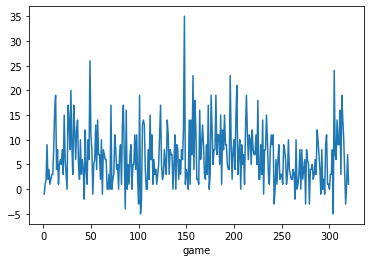

In [30]:
series.plot()
pyplot.show()

In [0]:
# Split data into train and test - 2000-2018 train, 2019 test
X = series.values
train, test = X[0:-16], X[-16:]